# Aim is to use given information to predict insurance premium charges for new customers

In [1]:
import pandas as pd
df = pd.read_csv('insurance.csv')

In [2]:
df.head(2)

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.90,0,yes,southwest,16884.9240
1,18,male,33.77,1,no,southeast,1725.5523


In [3]:
df.shape

(1338, 7)

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
age         1338 non-null int64
sex         1338 non-null object
bmi         1338 non-null float64
children    1338 non-null int64
smoker      1338 non-null object
region      1338 non-null object
charges     1338 non-null float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.2+ KB


In [5]:
df.describe()

,age,bmi,children,charges
count,1338.000000,1338.000000,1338.000000,1338.000000
mean,39.207025,30.663397,1.094918,13270.422265
std,14.049960,6.098187,1.205493,12110.011237
min,18.000000,15.960000,0.000000,1121.873900
25%,27.000000,26.296250,0.000000,4740.287150
50%,39.000000,30.400000,1.000000,9382.033000
75%,51.000000,34.693750,2.000000,16639.912515
max,64.000000,53.130000,5.000000,63770.428010


In [6]:
df.corr()

,age,bmi,children,charges
age,1.000000,0.109272,0.042469,0.299008
bmi,0.109272,1.000000,0.012759,0.198341
children,0.042469,0.012759,1.000000,0.067998
charges,0.299008,0.198341,0.067998,1.000000


In [7]:
import matplotlib.pyplot as plt
fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(12,10))
df.plot(kind='hist', y = 'age', bins = 70, color = 'b', ax = axes[0][0])
df.plot(kind='hist', y = 'bmi', bins = 100, color = 'r', ax = axes[0][1])
df.plot(kind='hist', y = 'children', bins = 6, color = 'g', ax = axes[1][0])
df.plot(kind='hist', y = 'charges', bins = 100, color = 'orange', ax = axes[1][1])

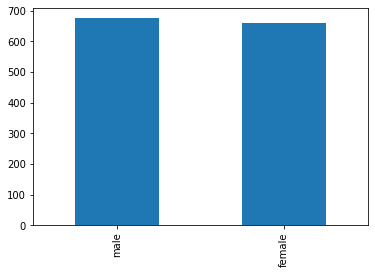

In [8]:
df['sex'].value_counts().plot(kind = 'bar')

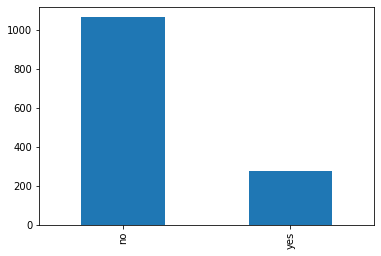

In [9]:
df['smoker'].value_counts().plot(kind = 'bar')

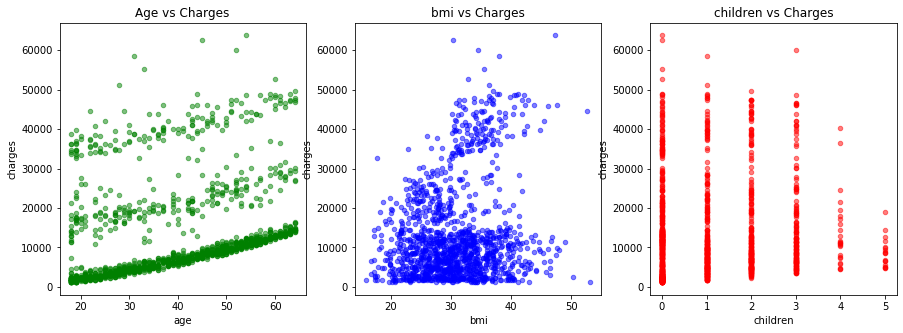

In [10]:
import matplotlib.pyplot as plt
fig, axes = plt.subplots(nrows=1, ncols=3, figsize=(15,5))
df.plot(kind='scatter', x = 'age', y = 'charges', alpha = 0.5, color = 'green', ax = axes[0], title = 'Age vs Charges')
df.plot(kind='scatter', x = 'bmi', y = 'charges', alpha = 0.5, color = 'blue', ax = axes[1], title = 'bmi vs Charges')
df.plot(kind='scatter', x = 'children', y = 'charges', alpha = 0.5, color = 'red', ax = axes[2], title = 'children vs Charges')
plt.show()

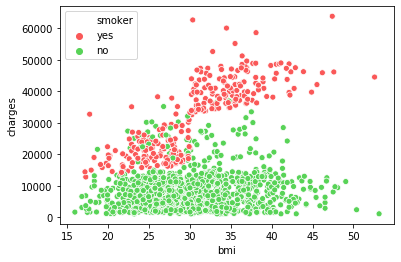

In [11]:
import seaborn as sns
pal = ["#FA5858", "#58D357"]
sns.scatterplot(x='bmi', y='charges', data = df, palette=pal, hue='smoker')

/anaconda3/lib/python3.7/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


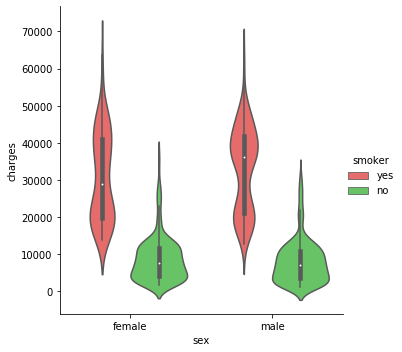

In [12]:
pal = ["#FA5858", "#58D357"]
sns.catplot(x='sex', y='charges', hue='smoker', kind = 'violin', data = df, palette = pal)

Text(0.5, 1, 'smokers')

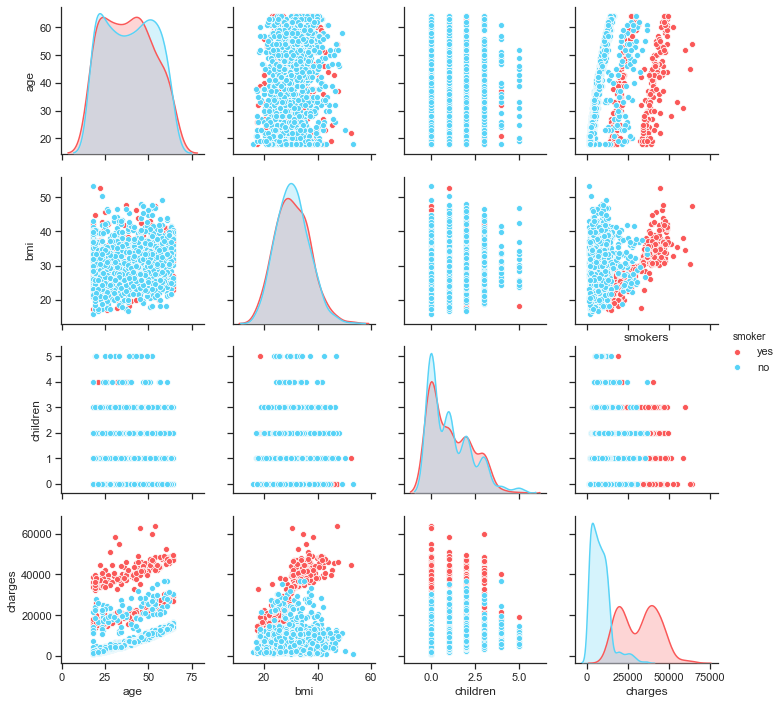

In [13]:
sns.set(style = 'ticks')
pal = ["#FA5858", "#58D3F7"]

sns.pairplot(df, hue='smoker', palette = pal)
plt.title('smokers')

In [14]:
# Preparing Data for ML Algorithm
df.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


In [15]:
df['region'].unique()

array(['southwest', 'southeast', 'northwest', 'northeast'], dtype=object)

In [16]:
df.drop(['region'], axis=1, inplace = True)

In [17]:
# Changing binary to 1's and 0's
df['sex'] = df['sex'].map(lambda s:1 if s == 'female' else 0)
df['smoker'] = df['smoker'].map(lambda s:1 if s == 'yes' else 0)

In [18]:
df.head(2)

,age,sex,bmi,children,smoker,charges
0,19,1,27.90,0,1,16884.9240
1,18,0,33.77,1,0,1725.5523


In [19]:
X = df.drop(['charges'], axis = 1)
y = df.charges

In [20]:
# Modeling the data
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0)

lr = LinearRegression()
lr = lr.fit(X_train, y_train)

y_pred = lr.predict(X_test)

#calculating the R2 score
print(lr.score(X_test, y_test))

0.7952171980481992


In [21]:
results = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred})
results

,Actual,Predicted
578,9724.53000,11457.247488
610,8547.69130,9925.930740
569,45702.02235,37768.549419
1034,12950.07120,15853.346790
198,9644.25250,6939.119725
981,4500.33925,3715.158091
31,2198.18985,1226.517979
1256,11436.73815,14013.625319
1219,7537.16390,8801.377937
1320,5425.02335,7319.356930


In [22]:
# Normalize the data
from sklearn.preprocessing import StandardScaler

sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

In [23]:
pd.DataFrame(X_train).head()

,0,1,2,3,4
0,-0.514853,0.985155,-0.181331,-0.063607,-0.503736
1,1.548746,0.985155,-1.393130,-0.892144,-0.503736
2,-1.439915,-1.015069,-0.982242,-0.063607,-0.503736
3,-1.368757,0.985155,-1.011133,-0.892144,1.985167
4,-0.941805,0.985155,-1.362635,-0.892144,-0.503736


In [24]:
pd.DataFrame(y_train).head()

,charges
1075,4562.84210
131,13616.35860
15,1837.23700
1223,26125.67477
1137,3176.28770


In [25]:
# Import Linear Regression model
from sklearn.linear_model import LinearRegression 

# Create a instance for Linear Regression model
multiple_linear_reg = LinearRegression(fit_intercept=False)

# Fit data to the model
multiple_linear_reg.fit(X_train, y_train) 

LinearRegression(copy_X=True, fit_intercept=False, n_jobs=None, normalize=False)

In [26]:
from sklearn.preprocessing import PolynomialFeatures

# Create a PolynomialFeatures instance in degree 3
polynomial_features = PolynomialFeatures(degree=3)  

# Fit and transform the training data to polynomial
x_train_poly = polynomial_features.fit_transform(X_train)  

# Fit and transform the testing data to polynomial
x_test_poly = polynomial_features.fit_transform(X_test)  

# Create a instance for Linear Regression model
polynomial_reg = LinearRegression(fit_intercept=False)  

# Fit data to the model
polynomial_reg.fit(x_train_poly, y_train) 

LinearRegression(copy_X=True, fit_intercept=False, n_jobs=None, normalize=False)

In [27]:
# Import Decision Tree Regression model
from sklearn.tree import DecisionTreeRegressor  

# Create a instance for Decision Tree Regression model
decision_tree_reg = DecisionTreeRegressor(max_depth=5, random_state=13) 

# Fit data to the model
decision_tree_reg.fit(X_train, y_train)  

DecisionTreeRegressor(ccp_alpha=0.0, criterion='mse', max_depth=5,
                      max_features=None, max_leaf_nodes=None,
                      min_impurity_decrease=0.0, min_impurity_split=None,
                      min_samples_leaf=1, min_samples_split=2,
                      min_weight_fraction_leaf=0.0, presort='deprecated',
                      random_state=13, splitter='best')

In [28]:
# Import Random Forest Regression model
from sklearn.ensemble import RandomForestRegressor 

# Create a instance for Random Forest Regression model
random_forest_reg = RandomForestRegressor(n_estimators=400, max_depth=5, random_state=13)  

# Fit data to the model
random_forest_reg.fit(X_train, y_train) 

RandomForestRegressor(bootstrap=True, ccp_alpha=0.0, criterion='mse',
                      max_depth=5, max_features='auto', max_leaf_nodes=None,
                      max_samples=None, min_impurity_decrease=0.0,
                      min_impurity_split=None, min_samples_leaf=1,
                      min_samples_split=2, min_weight_fraction_leaf=0.0,
                      n_estimators=400, n_jobs=None, oob_score=False,
                      random_state=13, verbose=0, warm_start=False)

In [29]:
# Import SVR model
from sklearn.svm import SVR  

# Create a instance for Support Vector Regression model
support_vector_reg = SVR(gamma="auto", kernel="linear", C=1000)  

# Fit data to the model
support_vector_reg.fit(X_train, y_train)  

SVR(C=1000, cache_size=200, coef0=0.0, degree=3, epsilon=0.1, gamma='auto',
    kernel='linear', max_iter=-1, shrinking=True, tol=0.001, verbose=False)

In [30]:
# For K-Fold Cross Validation
from sklearn.model_selection import cross_val_predict 

# For find accuracy with R2 Score
from sklearn.metrics import r2_score  

# For MSE
from sklearn.metrics import mean_squared_error  

# For squareroot operation
from math import sqrt  

# Evaluating Multiple Linear Regression Model

In [31]:
# Prediction with training dataset:
y_pred_MLR_train = multiple_linear_reg.predict(X_train)

# Prediction with testing dataset:
y_pred_MLR_test = multiple_linear_reg.predict(X_test)

# Find training accuracy for this model:
accuracy_MLR_train = r2_score(y_train, y_pred_MLR_train)
print("Training Accuracy for Multiple Linear Regression Model: ", accuracy_MLR_train)

# Find testing accuracy for this model:
accuracy_MLR_test = r2_score(y_test, y_pred_MLR_test)
print("Testing Accuracy for Multiple Linear Regression Model: ", accuracy_MLR_test)

# Find RMSE for training data:
RMSE_MLR_train = sqrt(mean_squared_error(y_train, y_pred_MLR_train))
print("RMSE for Training Data: ", RMSE_MLR_train)

# Find RMSE for testing data:
RMSE_MLR_test = sqrt(mean_squared_error(y_test, y_pred_MLR_test))
print("RMSE for Testing Data: ", RMSE_MLR_test)

# Prediction with 10-Fold Cross Validation:
y_pred_cv_MLR = cross_val_predict(multiple_linear_reg, X, y, cv=10)

# Find accuracy after 10-Fold Cross Validation
accuracy_cv_MLR = r2_score(y, y_pred_cv_MLR)
print("Accuracy for 10-Fold Cross Predicted Multiple Linaer Regression Model: ", accuracy_cv_MLR)

Training Accuracy for Multiple Linear Regression Model:  -0.4895607457643887
Testing Accuracy for Multiple Linear Regression Model:  -0.324110208111029
RMSE for Training Data:  14589.30728329809
RMSE for Testing Data:  14438.166278828226
Accuracy for 10-Fold Cross Predicted Multiple Linaer Regression Model:  0.717113419200113


# Evaluating Polynomial Regression Model

In [32]:
# Prediction with training dataset:
y_pred_PR_train = polynomial_reg.predict(x_train_poly)

# Prediction with testing dataset:
y_pred_PR_test = polynomial_reg.predict(x_test_poly)

# Find training accuracy for this model:
accuracy_PR_train = r2_score(y_train, y_pred_PR_train)
print("Training Accuracy for Polynomial Regression Model: ", accuracy_PR_train)

# Find testing accuracy for this model:
accuracy_PR_test = r2_score(y_test, y_pred_PR_test)
print("Testing Accuracy for Polynomial Regression Model: ", accuracy_PR_test)

# Find RMSE for training data:
RMSE_PR_train = sqrt(mean_squared_error(y_train, y_pred_PR_train))
print("RMSE for Training Data: ", RMSE_PR_train)

# Find RMSE for testing data:
RMSE_PR_test = sqrt(mean_squared_error(y_test, y_pred_PR_test))
print("RMSE for Testing Data: ", RMSE_PR_test)

# Prediction with 10-Fold Cross Validation:
y_pred_cv_PR = cross_val_predict(polynomial_reg, polynomial_features.fit_transform(X), y, cv=10)

# Find accuracy after 10-Fold Cross Validation
accuracy_cv_PR = r2_score(y, y_pred_cv_PR)
print("Accuracy for 10-Fold Cross Predicted Polynomial Regression Model: ", accuracy_cv_PR)

Training Accuracy for Polynomial Regression Model:  0.8355011044822177
Testing Accuracy for Polynomial Regression Model:  0.8809722767878554
RMSE for Training Data:  4848.272876320127
RMSE for Testing Data:  4328.864933499881
Accuracy for 10-Fold Cross Predicted Polynomial Regression Model:  0.8391072917689265


# Evaluating Decision Tree Regression Model

In [33]:
# Prediction with training dataset:
y_pred_DTR_train = decision_tree_reg.predict(X_train)

# Prediction with testing dataset:
y_pred_DTR_test = decision_tree_reg.predict(X_test)

# Find training accuracy for this model:
accuracy_DTR_train = r2_score(y_train, y_pred_DTR_train)
print("Training Accuracy for Decision Tree Regression Model: ", accuracy_DTR_train)

# Find testing accuracy for this model:
accuracy_DTR_test = r2_score(y_test, y_pred_DTR_test)
print("Testing Accuracy for Decision Tree Regression Model: ", accuracy_DTR_test)

# Find RMSE for training data:
RMSE_DTR_train = sqrt(mean_squared_error(y_train, y_pred_DTR_train))
print("RMSE for Training Data: ", RMSE_DTR_train)

# Find RMSE for testing data:
RMSE_DTR_test = sqrt(mean_squared_error(y_test, y_pred_DTR_test))
print("RMSE for Testing Data: ", RMSE_DTR_test)

# Prediction with 10-Fold Cross Validation:
y_pred_cv_DTR = cross_val_predict(decision_tree_reg, X, y, cv=10)

# Find accuracy after 10-Fold Cross Validation
accuracy_cv_DTR = r2_score(y, y_pred_cv_DTR)
print("Accuracy for 10-Fold Cross Predicted Decision Tree Regression Model: ", accuracy_cv_DTR)

Training Accuracy for Decision Tree Regression Model:  0.8694256791947466
Testing Accuracy for Decision Tree Regression Model:  0.8711939682763064
RMSE for Training Data:  4319.5096631798915
RMSE for Testing Data:  4503.167201972113
Accuracy for 10-Fold Cross Predicted Decision Tree Regression Model:  0.8494241031595924


# Evaluating Random Forest Regression Model

In [34]:
# Prediction with training dataset:
y_pred_RFR_train = random_forest_reg.predict(X_train)

# Prediction with testing dataset:
y_pred_RFR_test = random_forest_reg.predict(X_test)

# Find training accuracy for this model:
accuracy_RFR_train = r2_score(y_train, y_pred_RFR_train)
print("Training Accuracy for Random Forest Regression Model: ", accuracy_RFR_train)

# Find testing accuracy for this model:
accuracy_RFR_test = r2_score(y_test, y_pred_RFR_test)
print("Testing Accuracy for Random Forest Regression Model: ", accuracy_RFR_test)

# Find RMSE for training data:
RMSE_RFR_train = sqrt(mean_squared_error(y_train, y_pred_RFR_train))
print("RMSE for Training Data: ", RMSE_RFR_train)

# Find RMSE for testing data:
RMSE_RFR_test = sqrt(mean_squared_error(y_test, y_pred_RFR_test))
print("RMSE for Testing Data: ", RMSE_RFR_test)

# Prediction with 10-Fold Cross Validation:
y_pred_cv_RFR = cross_val_predict(random_forest_reg, X, y, cv=10)

# Find accuracy after 10-Fold Cross Validation
accuracy_cv_RFR = r2_score(y, y_pred_cv_RFR)
print("Accuracy for 10-Fold Cross Predicted Random Forest Regression Model: ", accuracy_cv_RFR)

Training Accuracy for Random Forest Regression Model:  0.8786362276689045
Testing Accuracy for Random Forest Regression Model:  0.8969134302201285
RMSE for Training Data:  4164.37754192943
RMSE for Testing Data:  4028.5709486806763
Accuracy for 10-Fold Cross Predicted Random Forest Regression Model:  0.8573836617506323


# Evaluating Support Vector Regression Model

In [35]:
# Prediction with training dataset:
y_pred_SVR_train = support_vector_reg.predict(X_train)

# Prediction with testing dataset:
y_pred_SVR_test = support_vector_reg.predict(X_test)

# Find training accuracy for this model:
accuracy_SVR_train = r2_score(y_train, y_pred_SVR_train)
print("Training Accuracy for Support Vector Regression Model: ", accuracy_SVR_train)

# Find testing accuracy for this model:
accuracy_SVR_test = r2_score(y_test, y_pred_SVR_test)
print("Testing Accuracy for Support Vector Regression Model: ", accuracy_SVR_test)

# Find RMSE for training data:
RMSE_SVR_train = sqrt(mean_squared_error(y_train, y_pred_SVR_train))
print("RMSE for Training Data: ", RMSE_SVR_train)

# Find RMSE for testing data:
RMSE_SVR_test = sqrt(mean_squared_error(y_test, y_pred_SVR_test))
print("RMSE for Testing Data: ", RMSE_SVR_test)

# Prediction with 10-Fold Cross Validation:
y_pred_cv_SVR = cross_val_predict(support_vector_reg, X, y, cv=10)

# Find accuracy after 10-Fold Cross Validation
accuracy_cv_SVR = r2_score(y, y_pred_cv_SVR)
print("Accuracy for 10-Fold Cross Predicted Support Vector Regression Model: ", accuracy_cv_SVR)

Training Accuracy for Support Vector Regression Model:  0.6522181188488771
Testing Accuracy for Support Vector Regression Model:  0.734317356160215
RMSE for Training Data:  7049.511742428746
RMSE for Testing Data:  6467.427432128608
Accuracy for 10-Fold Cross Predicted Support Vector Regression Model:  0.7058131213464467


In [36]:
# Compare all results in one table
training_accuracies = [accuracy_MLR_train, accuracy_PR_train, accuracy_DTR_train, accuracy_RFR_train, accuracy_SVR_train]
testing_accuracies = [accuracy_MLR_test, accuracy_PR_test, accuracy_DTR_test, accuracy_RFR_test, accuracy_SVR_test]
training_RMSE = [RMSE_MLR_train, RMSE_PR_train, RMSE_DTR_train, RMSE_RFR_train, RMSE_SVR_train]
testing_RMSE = [RMSE_MLR_test, RMSE_PR_test, RMSE_DTR_test, RMSE_RFR_test, RMSE_SVR_test]
cv_accuracies = [accuracy_cv_MLR, accuracy_cv_PR, accuracy_cv_DTR, accuracy_cv_RFR, accuracy_cv_SVR]

parameters = ["fit_intercept=False", "fit_intercept=False", "max_depth=5", "n_estimators=400, max_depth=5", "kernel=”linear”, C=1000"]

table_data = {"Parameters": parameters, "Training Accuracy": training_accuracies, "Testing Accuracy": testing_accuracies, 
              "Training RMSE": training_RMSE, "Testing RMSE": testing_RMSE, "10-Fold Score": cv_accuracies}
model_names = ["Multiple Linear Regression", "Polynomial Regression", "Decision Tree Regression", "Random Forest Regression", "Support Vector Regression"]

table_dataframe = pd.DataFrame(data=table_data, index=model_names)
table_dataframe

,Parameters,Training Accuracy,Testing Accuracy,Training RMSE,Testing RMSE,10-Fold Score
Multiple Linear Regression,fit_intercept=False,-0.489561,-0.324110,14589.307283,14438.166279,0.717113
Polynomial Regression,fit_intercept=False,0.835501,0.880972,4848.272876,4328.864933,0.839107
Decision Tree Regression,max_depth=5,0.869426,0.871194,4319.509663,4503.167202,0.849424
Random Forest Regression,"n_estimators=400, max_depth=5",0.878636,0.896913,4164.377542,4028.570949,0.857384
Support Vector Regression,"kernel=”linear”, C=1000",0.652218,0.734317,7049.511742,6467.427432,0.705813


### Our best classifier is our Random Forests using 400 estimators and a max_depth of 5

# Let's test our best regression on some new data

In [37]:
input_data = {'age': [35],
              'sex': ['male'],
              'bmi': [26],
              'children': [0],
              'smoker': ['no'],
              'region': ['southeast']}

input_data = pd.DataFrame(input_data)
input_data

,age,sex,bmi,children,smoker,region
0,35,male,26,0,no,southeast


In [38]:
# Data pre-processing 
input_data.drop(["region"], axis=1, inplace=True) 
input_data['sex'] = input_data['sex'].map(lambda s :1  if s == 'female' else 0)
input_data['smoker'] = input_data['smoker'].map(lambda s :1  if s == 'yes' else 0)
input_data

,age,sex,bmi,children,smoker
0,35,0,26,0,0


In [39]:
# Scaling input data  
input_data = sc.transform(input_data)
input_data

array([[-0.30137763, -1.01506865, -0.75753763, -0.89214407, -0.50373604]])

In [40]:
# Reshaping input data in the format required by sklearn models
input_data = input_data.reshape(1, -1)
print(input_data.shape)
input_data

(1, 5)


array([[-0.30137763, -1.01506865, -0.75753763, -0.89214407, -0.50373604]])

In [41]:
# Get predicted insurance rate for our new customer
random_forest_reg.predict(input_data)

array([5961.85333748])